In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)


In [3]:
df = pd.read_csv(r"/content/DataCoSupplyChainDataset 1.csv", encoding='latin-1')   # change filename if needed
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,02-03-2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0.0,1/15/2018 11:24,Standard Class


In [5]:
df.shape

(5996, 53)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5996 entries, 0 to 5995
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Type                           5996 non-null   object 
 1   Days for shipping (real)       5996 non-null   int64  
 2   Days for shipment (scheduled)  5996 non-null   int64  
 3   Benefit per order              5996 non-null   float64
 4   Sales per customer             5996 non-null   float64
 5   Delivery Status                5996 non-null   object 
 6   Late_delivery_risk             5996 non-null   int64  
 7   Category Id                    5996 non-null   int64  
 8   Category Name                  5996 non-null   object 
 9   Customer City                  5996 non-null   object 
 10  Customer Country               5996 non-null   object 
 11  Customer Email                 5996 non-null   object 
 12  Customer Fname                 5996 non-null   o

In [9]:
df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,Longitude,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,5996.000000,5996.000000,5996.000000,5996.000000,5996.000000,5996.000000,5996.000000,5996.000000,5996.000000,5996.000000,5996.000000,5996.000000,5996.000000,5996.000000,5996.000000,5996.000000,5996.000000,5996.000000,5996.000000,5996.000000,5996.000000,5996.000000,5996.000000,374.000000,5996.000000,5996.000000,0.0,5995.000000,5995.0
mean,3.679286,3.211474,21.791731,184.804174,0.515344,27.141928,7565.646931,34756.778519,4.381921,29.337522,-84.418121,7565.646931,37012.751501,568.440794,21.279480,0.103357,91693.455971,125.206550,0.115315,2.524516,206.083349,184.804174,21.791731,54778.489305,568.440794,27.141928,NaN,125.192264,0.0
std,1.531775,1.218830,103.963631,121.642334,0.499806,18.985795,4919.555189,37574.785356,1.755601,9.825553,21.537108,4919.555189,22890.563834,374.584517,22.626261,0.070196,55881.891318,134.602387,0.472184,1.635378,135.072782,121.642334,103.963631,31448.129722,374.584517,18.985795,NaN,134.609068,0.0
min,0.000000,0.000000,-1140.790039,9.260000,0.000000,2.000000,6.000000,603.000000,2.000000,17.982491,-158.025986,6.000000,12.000000,24.000000,0.000000,0.000000,35.000000,11.290000,-2.750000,1.000000,11.290000,9.260000,-1140.790039,1841.000000,24.000000,2.000000,NaN,11.290000,0.0
25%,2.000000,2.000000,6.170000,99.580002,0.000000,17.000000,3663.000000,725.000000,3.000000,18.261061,-98.191452,3663.000000,17557.750000,365.000000,5.400000,0.040000,43902.500000,50.000000,0.070000,1.000000,119.970001,99.580002,6.170000,27604.000000,365.000000,17.000000,NaN,50.000000,0.0
50%,4.000000,4.000000,29.920000,163.770004,1.000000,18.000000,7163.000000,14609.000000,4.000000,32.957119,-75.765770,7163.000000,32887.000000,403.000000,14.975000,0.100000,82258.500000,59.990002,0.270000,2.000000,179.970001,163.770004,29.920000,55407.000000,403.000000,18.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,67.500000,263.959992,1.000000,37.000000,10563.000000,77489.250000,5.000000,38.942981,-66.370567,10563.000000,56589.500000,828.000000,30.000000,0.160000,141554.750000,129.990005,0.360000,4.000000,299.970001,263.959992,67.500000,85705.000000,828.000000,37.000000,NaN,129.990005,0.0
max,6.000000,4.000000,599.250000,1417.500000,1.000000,76.000000,20755.000000,98632.000000,12.000000,47.843224,115.049789,20755.000000,77202.000000,1363.000000,375.000000,0.250000,180517.000000,1500.000000,0.500000,5.000000,1500.000000,1417.500000,599.250000,99301.000000,1363.000000,76.000000,NaN,1500.000000,0.0


In [10]:
df.isnull().sum().sort_values(ascending=False)


,0
Product Description,5996
Order Zipcode,5622
Product Status,1
shipping date (DateOrders),1
Shipping Mode,1
Product Price,1
Late_delivery_risk,0
Delivery Status,0
Category Name,0
Customer City,0


In [11]:
date_cols = ['order date (DateOrders)', 'shipping date (DateOrders)']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')


In [12]:
numeric_cols = [
    'Sales', 'Benefit per order', 'Order Item Discount',
    'Order Item Product Price', 'Order Item Quantity',
    'Order Profit Per Order', 'Days for shipping (real)',
    'Days for shipment (scheduled)', 'Late_delivery_risk',
    'Latitude', 'Longitude'
]

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')


In [13]:
df.dropna(subset=['Order Id', 'Customer Id', 'Sales'], inplace=True)

categorical_cols = [
    'Shipping Mode', 'Delivery Status',
    'Customer Segment', 'Category Name',
    'Order Status', 'Market'
]

df[categorical_cols] = df[categorical_cols].fillna('Unknown')


In [14]:
df['Shipping Delay'] = (
    df['Days for shipping (real)'] -
    df['Days for shipment (scheduled)']
)


In [15]:
df['Profit Margin'] = df['Order Profit Per Order'] / df['Sales']


In [16]:
df['On-Time Delivery'] = np.where(
    df['Shipping Delay'] <= 0, 'Yes', 'No'
)


In [17]:
df['Order Year'] = df['order date (DateOrders)'].dt.year
df['Order Month'] = df['order date (DateOrders)'].dt.month
df['Order Quarter'] = df['order date (DateOrders)'].dt.to_period('Q').astype(str)


In [18]:
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['Sales'] >= Q1 - 1.5 * IQR) & (df['Sales'] <= Q3 + 1.5 * IQR)]


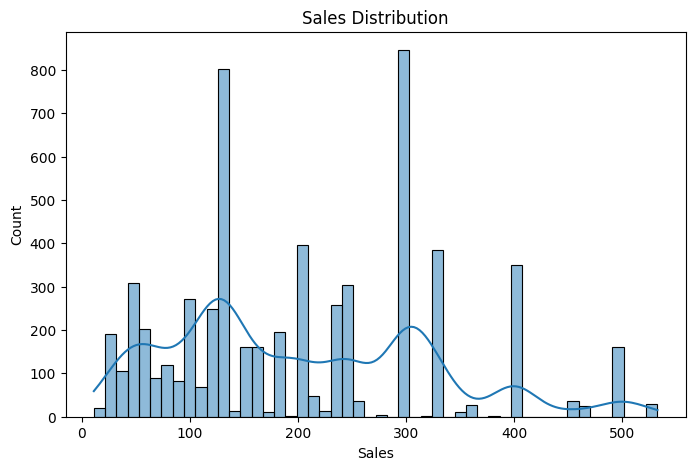

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(df['Sales'], bins=50, kde=True)
plt.title("Sales Distribution")
plt.show()


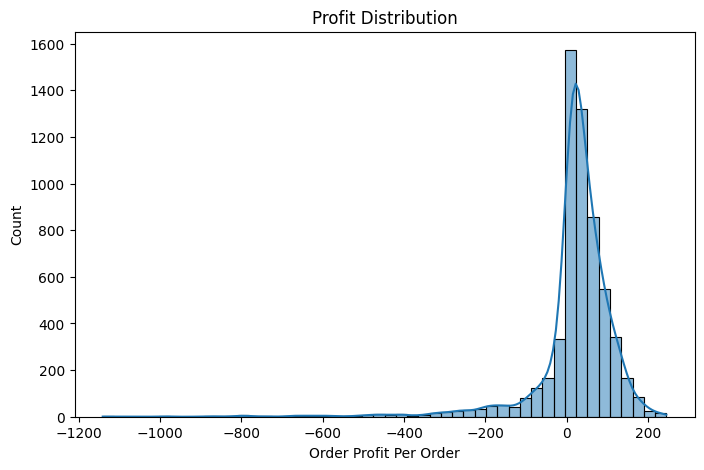

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(df['Order Profit Per Order'], bins=50, kde=True)
plt.title("Profit Distribution")
plt.show()


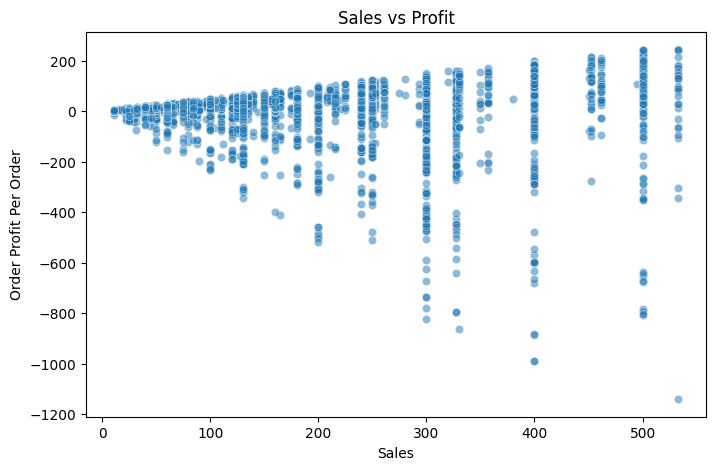

In [21]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Sales', y='Order Profit Per Order', data=df, alpha=0.5)
plt.title("Sales vs Profit")
plt.show()


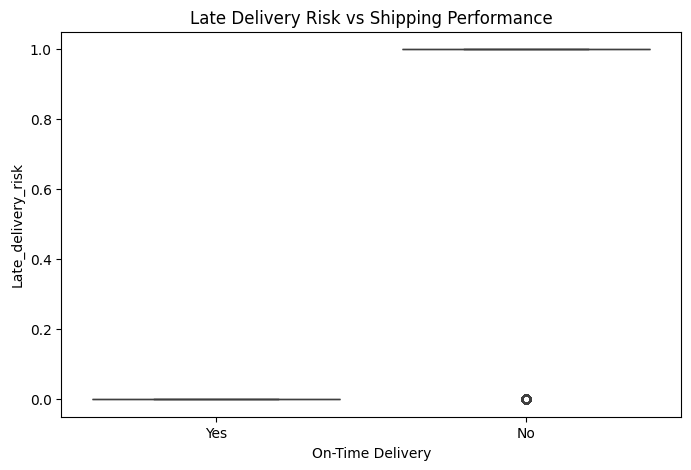

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot(x='On-Time Delivery', y='Late_delivery_risk', data=df)
plt.title("Late Delivery Risk vs Shipping Performance")
plt.show()


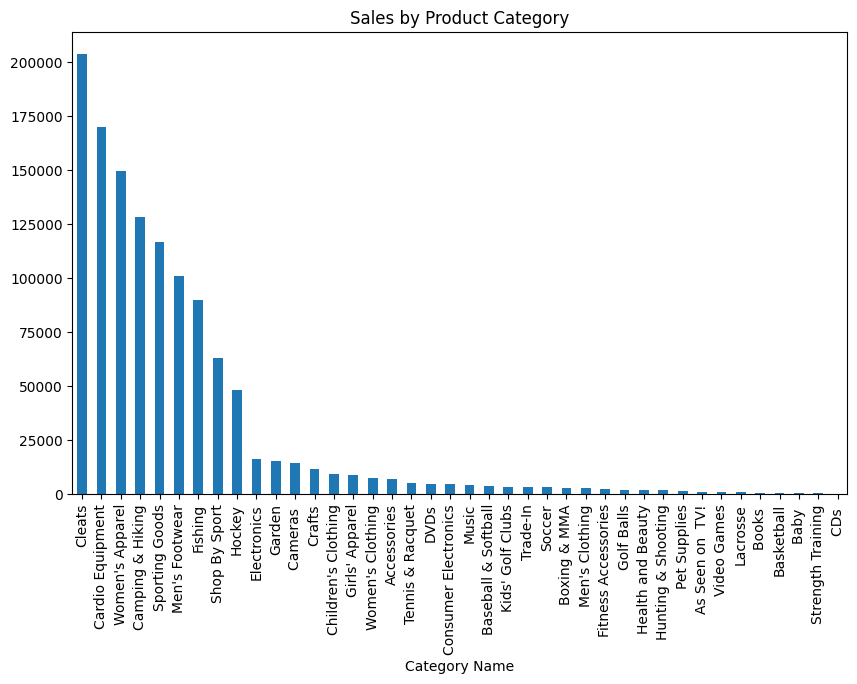

In [23]:
category_sales = df.groupby('Category Name')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
category_sales.plot(kind='bar')
plt.title("Sales by Product Category")
plt.show()


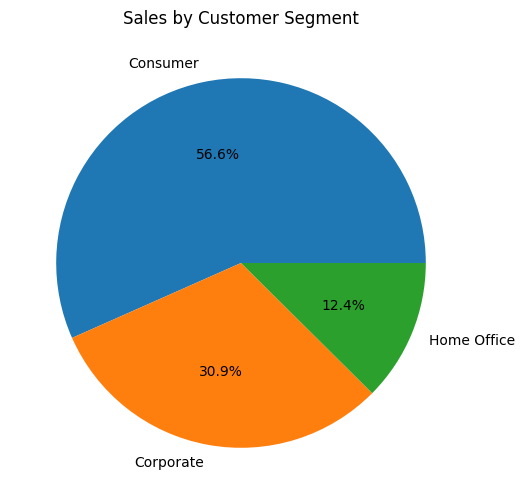

In [24]:
segment_sales = df.groupby('Customer Segment')['Sales'].sum()

plt.figure(figsize=(6,6))
segment_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title("Sales by Customer Segment")
plt.ylabel("")
plt.show()


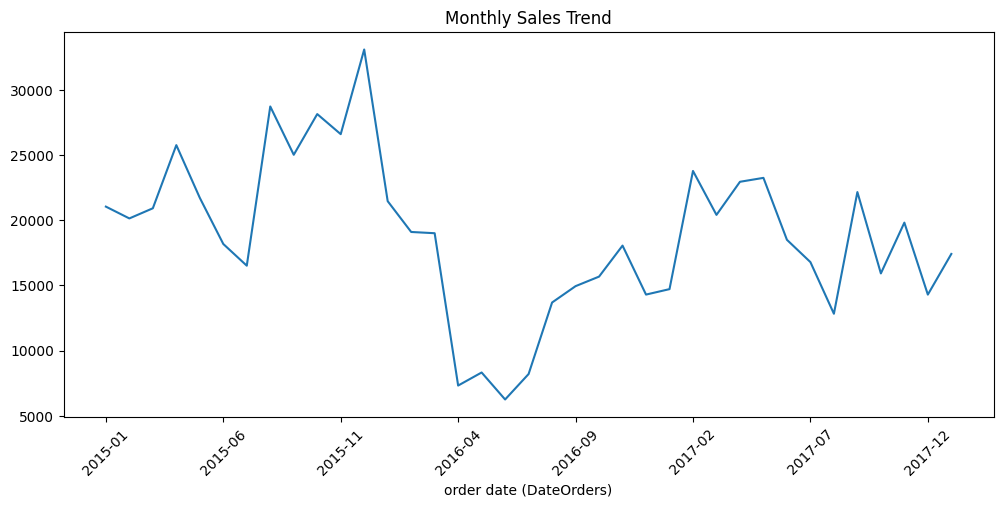

In [25]:
monthly_sales = df.groupby(
    df['order date (DateOrders)'].dt.to_period('M')
)['Sales'].sum()

monthly_sales.index = monthly_sales.index.astype(str)

plt.figure(figsize=(12,5))
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.show()


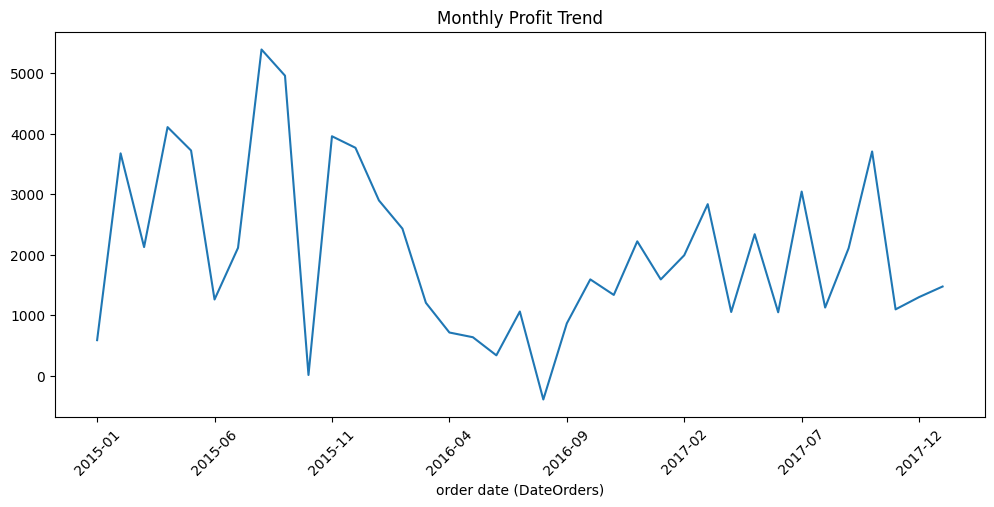

In [26]:
monthly_profit = df.groupby(
    df['order date (DateOrders)'].dt.to_period('M')
)['Order Profit Per Order'].sum()

monthly_profit.index = monthly_profit.index.astype(str)

plt.figure(figsize=(12,5))
monthly_profit.plot()
plt.title("Monthly Profit Trend")
plt.xticks(rotation=45)
plt.show()


In [27]:
df.to_csv("clean_orders_for_powerbi.csv", index=False)


In [28]:
required_columns = [
    # Order & Date
    'Order Id', 'order date (DateOrders)',
    'Order Year', 'Order Month', 'Order Quarter',

    # Sales & Finance
    'Sales', 'Order Profit Per Order', 'Benefit per order',
    'Order Item Discount', 'Order Item Product Price',
    'Order Item Quantity', 'Profit Margin',

    # Customer & Product
    'Customer Id', 'Customer Segment',
    'Category Name', 'Product Name',
    'Market', 'Order Region', 'Order Country',

    # Supply Chain
    'Shipping Mode', 'Delivery Status',
    'Days for shipping (real)', 'Days for shipment (scheduled)',
    'Shipping Delay', 'Late_delivery_risk', 'On-Time Delivery',

    # Geo
    'Latitude', 'Longitude'
]

df_final = df[required_columns].copy()


In [29]:
df_final.to_csv("powerbi_final_dataset.csv", index=False)
